Advanced Data Mining Project
Dataset Source: https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The first step is to load the dataset

In [254]:
df = pd.read_csv(r'RTA Dataset.csv')

Before preprocessing we need to understand the data

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [256]:
df['Accident_severity'].unique()

array(['Slight Injury', 'Serious Injury', 'Fatal injury'], dtype=object)

In [257]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [258]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [259]:
# To display the unique values for each feature
def print_unique_values(dataframe):
    for column in dataframe.columns:
        unique_vals = dataframe[column].unique()
        print(f"{column}: {unique_vals}")
        print()

print_unique_values(df)

Time: ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']

Day_of_week: ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']

Age_band_of_driver: ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']

Sex_of_driver: ['Male' 'Female' 'Unknown']

Educational_level: ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']

Vehicle_driver_relation: ['Employee' 'Unknown' 'Owner' nan 'Other']

Driving_experience: ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']

Type_of_vehicle: ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']

Owner_of_vehicle: ['Owner' 'Governmental' nan 'Organization' 'Other']

Service_year_of_vehicle: ['Above 10yr' '5-10yrs' nan '1-2yr' '2

In [260]:
df.shape

(12316, 32)

Preprocessing
Find out how many missing values there are and what is the percentage of missing values

In [261]:
# Replacing values such as unknown/Unknown with NaN, marking them as missing values
df.replace(['unknown', 'Unknown'], np.nan, inplace=True)

In [262]:
# Missing values count
missing_values_count = df.isnull().sum()
# Missing values percentage
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

In [263]:
missing_values_df = pd.DataFrame({
    'Feature': missing_values_count.index,
    'Missing Values': missing_values_count.values,
    'Percentage': missing_values_percentage.values
})

print(missing_values_df)

                        Feature  Missing Values  Percentage
0                          Time               0    0.000000
1                   Day_of_week               0    0.000000
2            Age_band_of_driver            1548   12.569016
3                 Sex_of_driver             178    1.445274
4             Educational_level             841    6.828516
5       Vehicle_driver_relation             593    4.814875
6            Driving_experience             862    6.999026
7               Type_of_vehicle             950    7.713543
8              Owner_of_vehicle             482    3.913608
9       Service_year_of_vehicle            6811   55.302046
10            Defect_of_vehicle            4427   35.945112
11        Area_accident_occured             261    2.119195
12             Lanes_or_Medians             442    3.588828
13              Road_allignment             142    1.152972
14            Types_of_Junction            1078    8.752842
15            Road_surface_type         

In [264]:
missing_columns = missing_values_count[missing_values_count > 0]
print("Features with missing values:")
print(missing_columns)

Features with missing values:
Age_band_of_driver         1548
Sex_of_driver               178
Educational_level           841
Vehicle_driver_relation     593
Driving_experience          862
Type_of_vehicle             950
Owner_of_vehicle            482
Service_year_of_vehicle    6811
Defect_of_vehicle          4427
Area_accident_occured       261
Lanes_or_Medians            442
Road_allignment             142
Types_of_Junction          1078
Road_surface_type           172
Weather_conditions          292
Type_of_collision           169
Vehicle_movement            396
Work_of_casuality          3217
Fitness_of_casuality       2635
Cause_of_accident            25
dtype: int64


In [265]:
num_features_with_missing_values = len(missing_columns)
print(f"There are {num_features_with_missing_values} features with missing values.")

There are 20 features with missing values.


Checking the class distribution of the accident severity feature to see if there is class imbalance

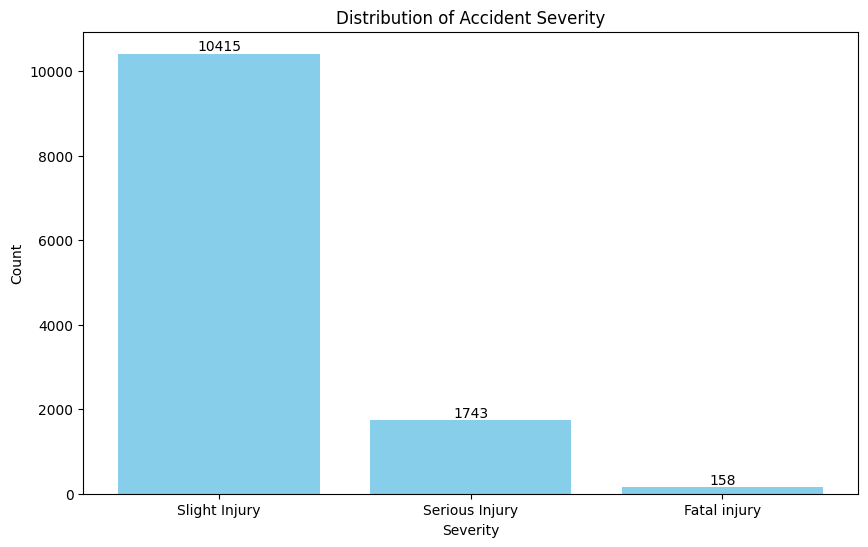

In [266]:
severity_counts = df['Accident_severity'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(severity_counts.index, severity_counts.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keeps the labels horizontal
plt.show()

As seen in the plot there is class imbalance in the accident severity feature

We used the chi-square test to test the connection between the features and the target feature

In [267]:
from scipy.stats import chi2_contingency
categorical_features = df.columns[df.columns != 'Accident_severity'].tolist()

chi_square_results = {}

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Accident_severity'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[feature] = p

print("P-values for Chi-square tests:")
for feature, p_value in chi_square_results.items():
    print(f"{feature}: {p_value}")

P-values for Chi-square tests:
Time: 0.0
Day_of_week: 4.300318794119764e-06
Age_band_of_driver: 7.452442073248769e-06
Sex_of_driver: 0.34293513426133304
Educational_level: 0.9818024099338314
Vehicle_driver_relation: 0.2677542946833754
Driving_experience: 0.04833484395993074
Type_of_vehicle: 0.09018330137326895
Owner_of_vehicle: 0.43000275577669866
Service_year_of_vehicle: 0.6753270118148866
Defect_of_vehicle: 0.6441860652399953
Area_accident_occured: 0.004247745713691539
Lanes_or_Medians: 0.28345179896377365
Road_allignment: 0.6734378459141934
Types_of_Junction: 2.826191890502061e-07
Road_surface_type: 0.20124010840608175
Road_surface_conditions: 0.4551747454425168
Light_conditions: 4.6279540659702016e-08
Weather_conditions: 0.0013174317968984509
Type_of_collision: 0.2106117751136205
Number_of_vehicles_involved: 3.0133430176891622e-62
Number_of_casualties: 2.0454183587168176e-67
Vehicle_movement: 0.4962953976473722
Casualty_class: 0.37222404710472334
Sex_of_casualty: 0.1472141479854398

We will drop the Service_year_of_vehicle feature because it has more than 55% missing data

In [268]:
df.drop('Service_year_of_vehicle', axis=1, inplace=True)
print(df.columns)

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Defect_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality',
       'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity'],
      dtype='object')


We will aslo drop the Defect_of_vehicle feature

In [269]:
df.drop('Defect_of_vehicle', axis=1, inplace=True)
print(df.columns)

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality',
       'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident',
       'Accident_severity'],
      dtype='object')


We will also drop the Work_of_casuality feature

In [270]:
df.drop('Work_of_casuality', axis=1, inplace=True)
print(df.columns)

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Fitness_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')


In [271]:
df.shape

(12316, 29)

We dropped features that have more than 25% of missing values

Now we will move on to some of the transformations so we can check the correlation

The first feature that will be transformed is the Time feature. We first set the type of the feature to be datetyme type so that we can categoriste it in the following way:
- Value 1: Morning - 06:00-12:00
- Value 2: Afternoon - 12:00-18:00
- Value 3: Evening - 18:00-00:00
- Value 4: Night - 00:00-06:00

This data is stored in a new feature called Time_of_Day and we will then drom the Time feature

In [272]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

def categorize_time(time):
    if time >= pd.Timestamp('06:00:00').time() and time < pd.Timestamp('12:00:00').time():
        return 1  # Morning
    elif time >= pd.Timestamp('12:00:00').time() and time < pd.Timestamp('18:00:00').time():
        return 2  # Afternoon
    elif time >= pd.Timestamp('18:00:00').time() and time < pd.Timestamp('00:00:00').time():
        return 3  # Evening
    else:
        return 4  # Night
    
df['Time_of_Day'] = df['Time'].apply(categorize_time)

In [273]:
df.drop('Time', axis=1, inplace=True)
print(df.columns)
print(df)

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Fitness_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity',
       'Time_of_Day'],
      dtype='object')
      Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0          Monday              18-30          Male   Above high school   
1          Monday              31-50          Male  Junior high school   
2          Monday              18-30          Male  Junior

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           10768 non-null  object
 2   Sex_of_driver                12138 non-null  object
 3   Educational_level            11475 non-null  object
 4   Vehicle_driver_relation      11723 non-null  object
 5   Driving_experience           11454 non-null  object
 6   Type_of_vehicle              11366 non-null  object
 7   Owner_of_vehicle             11834 non-null  object
 8   Area_accident_occured        12055 non-null  object
 9   Lanes_or_Medians             11874 non-null  object
 10  Road_allignment              12174 non-null  object
 11  Types_of_Junction            11238 non-null  object
 12  Road_surface_type            12144 non-null  object
 13  Road_surface_conditions      12

Next we will transform the Day_of_week feature.
- Value 1: Monday
- Value 2: Tuesday
- Value 3: Wednesday
- Value 4: Thursday
- Value 5: Friday
- Value 6: Saturday
- Value 7: Sunday

In [275]:
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

df['Day_of_week'] = df['Day_of_week'].map(day_mapping)

The next feature that we will transform is the Age_band_of_driver feature:
- Value 1: Under 18
- Value 2: 18-30
- Value 3: 31-50
- Value 4: Over 51

In [276]:
age_mapping = {
    'Under 18': 1,
    '18-30': 2,
    '31-50': 3,
    'Over 51': 4
}
df['Age_band_of_driver'] = df['Age_band_of_driver'].map(age_mapping)

The next feature that we will transform is the Sex_of_driver feature:
- Value 1: Male
- Value 2: Female

In [277]:
sex_mapping = {
    'Male': 1,
    'Female': 2
}
df['Sex_of_driver'] = df['Sex_of_driver'].map(sex_mapping)

In [278]:
df['Vehicle_driver_relation'].unique()

array(['Employee', nan, 'Owner', 'Other'], dtype=object)

Vehicle_driver_relation transformation:
- Value 1: Employee
- Value 2: Owner
- Value 3: Other

In [279]:
df_mapping = {
    'Employee': 1,
    'Owner': 2,
    'Other': 3
}
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].map(df_mapping)

In [280]:
df['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', nan, 'No Licence',
       'Below 1yr'], dtype=object)

Driving_experience transformation:
- Value 1: Below 1yr
- Value 2: 1-2yr
- Value 3: 2-5yr
- Value 4: 5-10yr
- Value 5: Above 10yr
- Value 6: No Licence

In [281]:
df_mapping = {
    'Below 1yr': 1,
    '1-2yr': 2,
    '2-5yr': 3,
    '5-10yr': 4,
    'Above 10yr': 5,
    'No Licence': 6
}
df['Driving_experience'] = df['Driving_experience'].map(df_mapping)

In [282]:
df['Owner_of_vehicle'].unique()

array(['Owner', 'Governmental', nan, 'Organization', 'Other'],
      dtype=object)

Owner_of_vehicle transformation:
- Value 1: Owner
- Value 2: Governmental
- Value 3: Organization
- Value 4: Other

In [283]:
df_mapping = {
    'Owner': 1,
    'Governmental': 2,
    'Organization': 3,
    'Other': 4
}
df['Owner_of_vehicle'] = df['Owner_of_vehicle'].map(df_mapping)

In [284]:
df['Area_accident_occured'].unique()

array(['Residential areas', 'Office areas', '  Recreational areas',
       ' Industrial areas', nan, 'Other', ' Church areas',
       '  Market areas', 'Rural village areas', ' Outside rural areas',
       ' Hospital areas', 'School areas',
       'Rural village areasOffice areas', 'Recreational areas'],
      dtype=object)

Lanes_or_Medians transformation:
- Value 1: Undivided Two way
- Value 2: Double carriageway (median)
- Value 3: One way
- Value 4: Two-way (divided with solid lines road marking)
- Value 5: Two-way (divided with broken lines road marking)
- Value 6: other

In [285]:
df['Lanes_or_Medians'].unique()

array([nan, 'Undivided Two way', 'other', 'Double carriageway (median)',
       'One way', 'Two-way (divided with solid lines road marking)',
       'Two-way (divided with broken lines road marking)'], dtype=object)

In [286]:
df_mapping = {
    'Undivided Two way': 1,
    'Double carriageway (median)': 2,
    'One way': 3,
    'Two-way (divided with solid lines road marking)': 4,
    'Two-way (divided with broken lines road marking)': 5,
    'other': 6
}
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].map(df_mapping)

In [287]:
df['Road_allignment'].unique()

array(['Tangent road with flat terrain', nan,
       'Tangent road with mild grade and flat terrain', 'Escarpments',
       'Tangent road with rolling terrain', 'Gentle horizontal curve',
       'Tangent road with mountainous terrain and',
       'Steep grade downward with mountainous terrain',
       'Sharp reverse curve',
       'Steep grade upward with mountainous terrain'], dtype=object)

Road_allignment transformation:


In [288]:
df_mapping = {
    'Tangent road with flat terrain': 1,
    'Tangent road with mild grade and flat terrain': 2,
    'Escarpments': 3,
    'Tangent road with rolling terrain': 4,
    'Gentle horizontal curve': 5,
    'Tangent road with mountainous terrain and': 6,
    'Steep grade downward with mountainous terrain': 7,
    'Sharp reverse curve': 8,
    'Steep grade upward with mountainous terrain': 9
}
df['Road_allignment'] = df['Road_allignment'].map(df_mapping)

In [289]:
df['Types_of_Junction'].unique()

array(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other', nan,
       'T Shape', 'X Shape'], dtype=object)

Types_of_Junction transformation

In [290]:
df_mapping = {
    'No junction': 1,
    'Y Shape': 2,
    'Crossing': 3,
    'O Shape': 4,
    'T Shape': 5,
    'X Shape': 6,
    'Other': 7
}
df['Types_of_Junction'] = df['Types_of_Junction'].map(df_mapping)

In [291]:
df['Road_surface_type'].unique()

array(['Asphalt roads', 'Earth roads', nan,
       'Asphalt roads with some distress', 'Gravel roads', 'Other'],
      dtype=object)

Road_surface_type transformation

In [292]:
df_mapping = {
    'Asphalt roads': 1,
    'Earth roads': 2,
    'Asphalt roads with some distress': 3,
    'Gravel roads': 4,
    'Other': 5
}
df['Road_surface_type'] = df['Road_surface_type'].map(df_mapping)

In [293]:
df['Road_surface_conditions'].unique()

array(['Dry', 'Wet or damp', 'Snow', 'Flood over 3cm. deep'], dtype=object)

Road_surface_conditions transformation

In [294]:
df_mapping = {
    'Dry': 1,
    'Wet or damp': 2,
    'Snow': 3,
    'Flood over 3cm. deep': 4
    }
df['Road_surface_type'] = df['Road_surface_type'].map(df_mapping)

In [295]:
df['Light_conditions'].unique()

array(['Daylight', 'Darkness - lights lit', 'Darkness - no lighting',
       'Darkness - lights unlit'], dtype=object)

Light_conditions transformation

In [296]:
df_mapping = {
    'Daylight': 1,
    'Darkness - lights lit': 2,
    'Darkness - no lighting': 3,
    'Darkness - lights unlit': 4
    }
df['Light_conditions'] = df['Light_conditions'].map(df_mapping)

In [297]:
df['Weather_conditions'].unique()

array(['Normal', 'Raining', 'Raining and Windy', 'Cloudy', 'Other',
       'Windy', 'Snow', nan, 'Fog or mist'], dtype=object)

Weather_conditions transformation

In [298]:
df_mapping = {
    'Normal': 1,
    'Raining': 2,
    'Raining and Windy': 3,
    'Cloudy': 4,
    'Windy': 5,
    'Snow': 6,
    'Fog or mist': 7,
    'Other': 8
}
df['Weather_conditions'] = df['Weather_conditions'].map(df_mapping)

In [299]:
df['Type_of_collision'].unique()

array(['Collision with roadside-parked vehicles',
       'Vehicle with vehicle collision',
       'Collision with roadside objects', 'Collision with animals',
       'Other', 'Rollover', 'Fall from vehicles',
       'Collision with pedestrians', 'With Train', nan], dtype=object)

Type_of_collision transformation

In [300]:
df_mapping = {
    'Collision with roadside-parked vehicles': 1,
    'Vehicle with vehicle collision': 2,
    'Collision with roadside objects': 3,
    'Collision with animals': 4,
    'Rollover': 5,
    'Fall from vehicles': 6,
    'Collision with pedestrians': 7,
    'With Train': 8,
    'Other': 9
}
df['Type_of_collision'] = df['Type_of_collision'].map(df_mapping)

Vehicle_movement transformation

In [301]:
df['Vehicle_movement'].unique()

array(['Going straight', 'U-Turn', 'Moving Backward', 'Turnover',
       'Waiting to go', 'Getting off', 'Reversing', nan, 'Parked',
       'Stopping', 'Overtaking', 'Other', 'Entering a junction'],
      dtype=object)

In [302]:
df_mapping = {
    'Going straight': 1,
    'U-Turn': 2,
    'Moving Backward': 3,
    'Turnover': 4,
    'Waiting to go': 5,
    'Getting off': 6,
    'Reversing': 7,
    'Parked': 8,
    'Stopping': 9,
    'Overtaking': 10,
    'Entering a junction': 11,
    'Other': 12
}
df['Vehicle_movement'] = df['Vehicle_movement'].map(df_mapping)

In [303]:
df['Casualty_class'].unique()

array(['na', 'Driver or rider', 'Pedestrian', 'Passenger'], dtype=object)

Casualty_class transformation

In [304]:
df_mapping = {
    'Driver or rider': 1,
    'Pedestrian': 2,
    'Passenger': 3    
}
df['Casualty_class'] = df['Casualty_class'].map(df_mapping)

In [305]:
df['Sex_of_casualty'].unique()

array(['na', 'Male', 'Female'], dtype=object)

In [306]:
sex_mapping = {
    'Male': 1,
    'Female': 2
}
df['Sex_of_casualty'] = df['Sex_of_casualty'].map(sex_mapping)

In [307]:
df['Age_band_of_casualty'].unique()

array(['na', '31-50', '18-30', 'Under 18', 'Over 51', '5'], dtype=object)

Age_band_of_casualty transformation

In [308]:
age_mapping = {
    'Under 18': 1,
    '5': 1,
    '18-30': 2,
    '31-50': 3,
    'Over 51': 4
}
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].map(age_mapping)

In [309]:
df['Fitness_of_casuality'].unique()

array([nan, 'Normal', 'Deaf', 'Other', 'Blind', 'NormalNormal'],
      dtype=object)

Fitness_of_casuality transformation

In [310]:
df_mapping = {
    'Normal': 1,
    'NormalNormal': 1,
    'Deaf': 2,
    'Blind': 3,
    'Other':4 
}
df['Fitness_of_casuality'] = df['Fitness_of_casuality'].map(df_mapping)

Pedestrian_movement transformation

In [311]:
df['Pedestrian_movement'].unique()

array(['Not a Pedestrian', "Crossing from driver's nearside",
       'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle',
       'Unknown or other',
       'Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)',
       'Walking along in carriageway, back to traffic',
       'Walking along in carriageway, facing traffic',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle'],
      dtype=object)

In [312]:
df_mapping = {
    'Not a Pedestrian': 1,
    "Crossing from driver's nearside": 2,
    'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle': 3,
    'Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle': 4,
    'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)': 5,
    'Walking along in carriageway, back to traffic': 6,
    'Walking along in carriageway, facing traffic': 7,
    'Unknown or other': np.nan,
    'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle': 8
}
df['Pedestrian_movement'] = df['Pedestrian_movement'].map(df_mapping)